In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
    

# fix random seed for reproducibility
np.random.seed(7)


In [ ]:
# Thanks to mycurvefit: https://www.mycurvefit.com/share/2b870511-e17d-427c-abb2-0474e8836e4c
curve = np.vectorize(lambda x: -11.29951 + 15.88552*x - 4.245582*np.power(x,2) + 0.4198223*np.power(x,3) - 0.01330597*np.power(x,4))


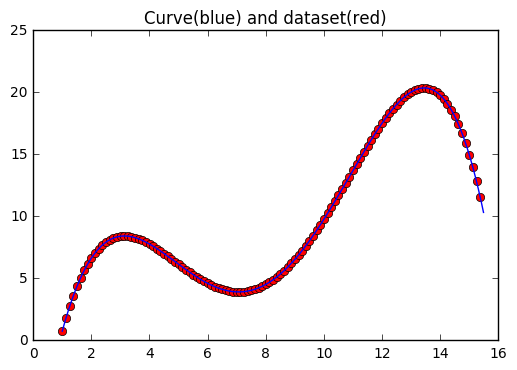

Trainset has 116 points


In [ ]:
# Prepare our data and display chart
Xideal = np.arange(1, 15.5, 0.005)
Yideal = curve(Xideal)
X = Xideal[1::25]
Y = curve(X)
plt.title('Curve(blue) and dataset(red)')
plt.plot(X, Y, 'ro')
plt.plot(Xideal, Yideal)
plt.show()
print("Trainset has %d points" % X.size)

In [ ]:
# Define model
model = Sequential()
model.add(Dense(150, activation='sigmoid', input_dim=1))
model.add(Dense(100, activation='tanh'))
model.add(Dense(1))

# Compile it
model.compile(loss='mse', optimizer='sgd', metrics=['mse'])

# Fit (try to experiment with epochs and batch size)
model.fit(X, Y, nb_epoch=5000, batch_size=20, verbose=0)

# Evaluate the model
scores = model.evaluate(Xideal, Yideal)

print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))
print("%s: %.2f" % (model.metrics_names[1], scores[1]))


2592/2900 [=========================>....] - ETA: 0s
loss: 145.43%
mean_squared_error: 1.45


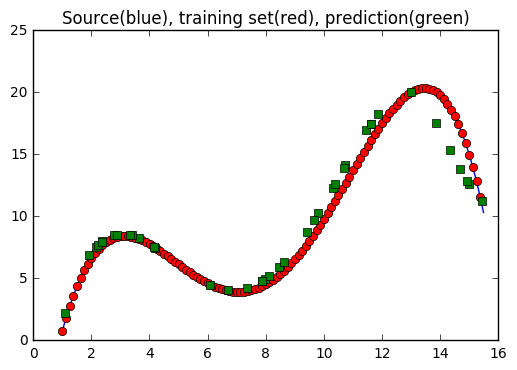

In [ ]:
# Predict and plot 
Xsample = np.random.choice(Xideal, size=40)
Ysample = model.predict(np.stack([Xsample], axis=-1))[:,0]
plt.title('Source(blue), training set(red), prediction(green)')
plt.plot(Xideal, Yideal)
plt.plot(X, Y, 'ro')
plt.plot(Xsample, Ysample, 'gs')
plt.show()

In [ ]:
# Lets predict some numbers and build show them in table
Xpredictions = np.sort(np.random.choice(Xideal, size=20))
predictions = model.predict(Xpredictions)[:,0]
expected = curve(Xpredictions)

frmt = np.vectorize(lambda x: "{:15.3f}".format(x))
print("Some samples")
table = np.stack([frmt(Xpredictions), frmt(expected), frmt(predictions), frmt(abs(expected-predictions))], axis=-1)
header = [ "{:>15}".format(h) for h in ["x", 'y', 'predicted', 'absdiff'] ]
print("".join(header))
for l in table: print("".join(l))

Some samples
              x              y      predicted        absdiff
          1.420          3.845          4.320          0.475
          2.475          7.876          8.158          0.282
          2.495          7.911          8.186          0.276
          3.195          8.422          8.574          0.152
          3.460          8.321          8.441          0.120
          3.790          8.032          8.083          0.050
          4.680          6.706          6.618          0.088
          4.765          6.559          6.475          0.084
          4.805          6.490          6.408          0.081
          6.490          4.129          4.164          0.034
          6.835          3.950          4.084          0.134
          9.295          7.372          8.354          0.983
         10.650         12.284         13.717          1.433
         11.140         14.260         15.853          1.592
         11.250         14.700         16.275          1.575
         12